# Release Groups

[This note-book is in oceantracker/tutorials_how_to/]

A release group is a set of particles released at the same times and location. There can be many release groups. This enables the fate of particles from different origins to be tracked separately within the same computational run. Importantly,  on the fly statistics  are separated into release groups. Eg. gridded statistics return a heat map for each release group, while polygon statistics give the connectivity between each given polygon and each release group.    

A release group may be a:

* "point_releases" set points, giving one or more 2D or 3D locations where particles are released. A radius for 2D release around theses point also can be set. 
    
* "polygon release", where particles are released randomly within polygon made up of 3 or more 2D points. Particles will not be released in any parts of the polygon outside the domain. 

* "grid_release", particles released from points on a regular grid.
    
For polygons, the vertical release location is randomly chosen in the water column, or user a given  in z range. If the z value of a point release is not given, then the vertical release location is chosen in the same manner. 

For both types user can specify:

   * time to start and end the release, or the duration of the release. Defaults are to start at beginning of hindcast and continue until it's end. 

   * the time between releases, the  "release_interval",  a zero value gives a single release.

   * the number of particles release each time, the "pulse_size"

   * whether to release in dry cells, default "allow_release_in_dry_cells" = False

Plus other options see:

add links...




    

In [1]:
# show example of release types with start and end times, 
#------------------------------------------------
from oceantracker.main import OceanTracker
ot = OceanTracker()

# ot.settings method use to set basic settings
ot.settings(output_file_base='minimal_example', # name used as base for output files
            root_output_dir='output',             #  output is put in dir   'root_output_dir'\\'output_file_base'
            time_step= 120. #  2 min time step as seconds
            )
# ot.set_class, sets parameters for a named class
ot.add_class('reader',input_dir= '../demos/demo_hindcast/schsim3D',  # folder to search for hindcast files, sub-dirs will, by default, also be searched
                      file_mask=  'demo_hindcast_schisim3D*.nc')  # hindcast file mask

# add  point release locations from two points,
ot.add_class('release_groups', 
                    class_name='PointRelease', # point is the default so no needed for point example
                    points= [[1595000, 5482600, -1],        #[x,y,z(optional)] pairs of release locations
                             [1595000, 5486200, -1]],      # must be an N by 2 or 3 or list, convertible to a numpy array
                    release_interval= 1800,   # seconds between releasing particles
                    pulse_size= 10,           # number of particles released each release_interval
            )
# add a polygon release
ot.add_class('release_groups',
         class_name='PolygonRelease',  # class to use
         # (x,y) points making up a 2D polygon
         points=[[1597682., 5486972], [1598604, 5487275], [1598886, 5486464],
                 [1597917., 5484000], [1597300, 5484000], [1597682, 5486972]],
         # the below are optional settings/parameters
         release_interval=3600, 
         pulse_size=10,
         z_min=-2., z_max=0.5) # set a z range to release, in default is full water depth
ot.add_class('release_groups',  
        class_name='GridRelease',  # class to use
        start='2017-01-01T02:30:00',  # optional start and end times
        grid_center=[1592000, 5489200],  # location of grid centre
        grid_span=[500, 1000],  # size of grid in meters
        grid_size=[3, 4],  # rows and columns in grid
        release_interval=1800, 
        pulse_size=2,
        z_min=-2, z_max=-0.5)  # release at random depth between these values
# run oceantracker
case_info_file_name = ot.run()

helper ----------------------------------------------------------------------
helper Starting OceanTracker helper class
helper   - Starting run using helper class
Main      Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]
Main >>> Warning: Oceantracker is not yet compatible with Python 3.11, as not all imported packages have been updated, eg netcdf4
Main ----------------------------------------------------------------------
Main OceanTracker starting main:
Main     Starting package set up
Main         -  Built OceanTracker package tree,	  0.602 sec
Main         -  Built OceanTracker sort name map,	  0.000 sec
Main     -  Done package set up to setup ClassImporter,	  0.602 sec
Main >>> Warning: Deleted contents of existing output dir
Main Output is in dir "f:\H_Local_drive\ParticleTracking\oceantracker\tutorials_how_to\output\minimal_example"
Main       hint: see for copies of screen output and user supplied parameters, plus al

# plot tracks

dict_keys(['status_unknown', 'status_bad_cord', 'status_cell_search_failed', 'status_notReleased', 'status_dead', 'status_outside_open_boundary', 'status_stationary', 'status_stranded_by_tide', 'status_on_bottom', 'status_moving', 'file_created', 'total_num_particles_released', 'time_steps_written', 'dimensions', 'status', 'dry_cell_index', 'grid_release_row_col', 'ID', 'particles_written_per_time_step', 'x0', 'age', 'water_depth', 'time_released', 'particle_ID', 'A_Z_profile', 'IDpulse', 'num_part_released_so_far', 'IDrelease_group', 'hydro_model_gridID', 'tide', 'time_step_range', 'time', 'x', 'user_release_groupID', 'z', 'grid', 'particle_status_flags', 'particle_release_groups', 'axis_lim'])


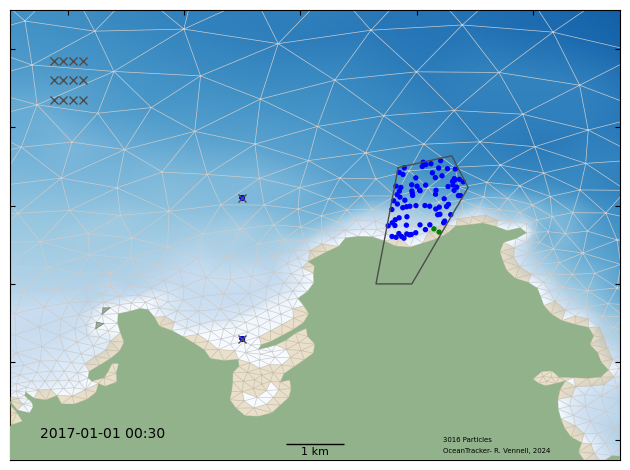

In [5]:
from read_oceantracker.python import load_output_files
from IPython.display import HTML
from plot_oceantracker.plot_tracks import animate_particles

# read particle track data into a dictionary using case_info_file_name
tracks = load_output_files.load_track_data(case_info_file_name)
print(tracks.keys()) # show what is in tracks dictionary holds

ax= [1591000, 1601500, 5479500, 5491000]  # area to plot
anim=animate_particles(tracks, axis_lims=ax, show_grid=True,show_dry_cells=True)

HTML(anim.to_html5_video())# this is slow to build!